# Case Study Candy-Data Lidl

## Task
The Lidl purchasing group wants to expand our candy offering. These are store brand candies that we sell along the brand offerings. The idea is to create a brand new product. The team is discussing various options at the moment.

The market research data is now available and it is our job to find out which product characteristics drive customer sentiment and subsequently make a recommendation on a new product.

## Aproach

It is an inference problem consisting of multiple variables (multivariate). We have to find out which features are contributing more towards the higher winpercent in a match up of 269000 candies against eachother. We are not focusing on making correct prediction for winpercent rather the charecteristics which contributes to it. We can build regression models to calculate the affects of different features on winpercent.

## Import necessary libraries

In [133]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, probplot


## Load the Data

In [160]:
df = pd.read_csv("candy-data.csv")



# Data Preprocessing
## Data Overview

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.7+ KB


In [163]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


## Observations
- Data containts 13 Columns and 85 Rows
- First Column "competitorname" contains the brand name of candies and is of object type
- Columns 2 - 10 are numeric (integer) and consist of binary values 0 and 1
- Columns 11 and 12 are numeric (float) and represent percentile
- Last column (numeric float) is the predictor varibale is in percentage showing win percentage for the given candy
- No NAs or missing values

## Let's count the no of candies having different traits

In [165]:
df.iloc[:,1:10].sum(axis=0,numeric_only=True)

chocolate           37
fruity              38
caramel             14
peanutyalmondy      14
nougat               7
crispedricewafer     7
hard                15
bar                 21
pluribus            44
dtype: int64

## Observations
- Chocolate and fruity are the most common features
- More than half (51.76%) of the candies are coming from a bag or box of candies (pluribus)

## Check for illegal Values and outliers

In [198]:
illegal_val = 0
for col in df.columns[1:10]: # looping through binary values columns
    for i in df.index:
        if df.loc[i,col] != 0 and df.loc[i,col] != 1: # checking for values other than 0 and 1
            illegal_val=1
            print (col + "contains illegal values")
            break
            
if illegal_val == 0:
    print ("No illegal values in binary values columns.")
            


No illegal values in binary values columns.


#### Scaling winpercent to scale of (0 to 1) so that it will be on same scale as other variables

In [209]:
df['winpercent']=df['winpercent']/100

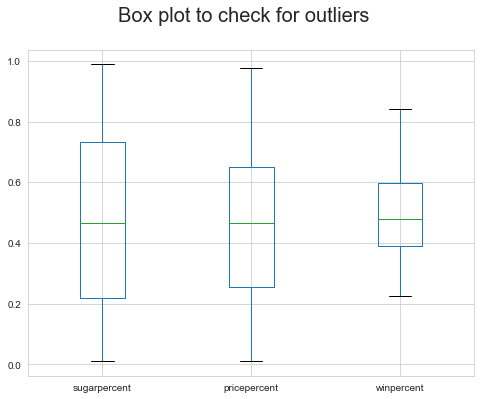

In [213]:
plt.figure(figsize=(8,6))
plt.suptitle("Box plot to check for outliers", fontsize=20)
df.boxplot(column=['sugarpercent','pricepercent','winpercent'])
plt.show()

## Observations
- No obvious outliers

# EDA (Exploratory Data Analysis)

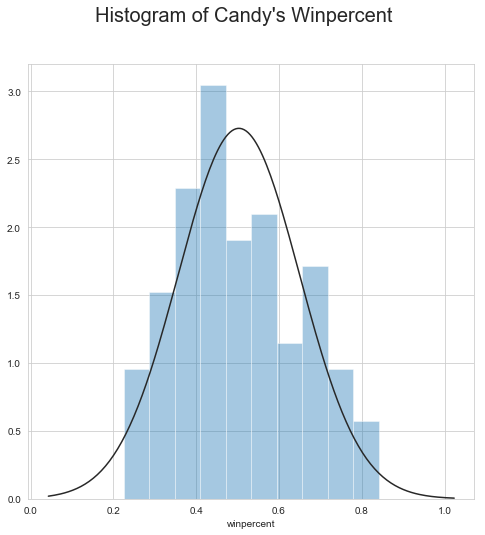

In [375]:
sns.set_style("whitegrid") # setting background grid color

plt.figure(figsize=(8,8))
plt.suptitle("Histogram of Candy's Winpercent", fontsize=20)
sns.distplot(df["winpercent"],  bins=10,fit= norm, kde =False) # using normal fit line
plt.savefig("candy_winpercent.jpg")
plt.show()

## Observations
- Slightly positive skew
- Predictor variable has almost normal distribution so no need for transformation

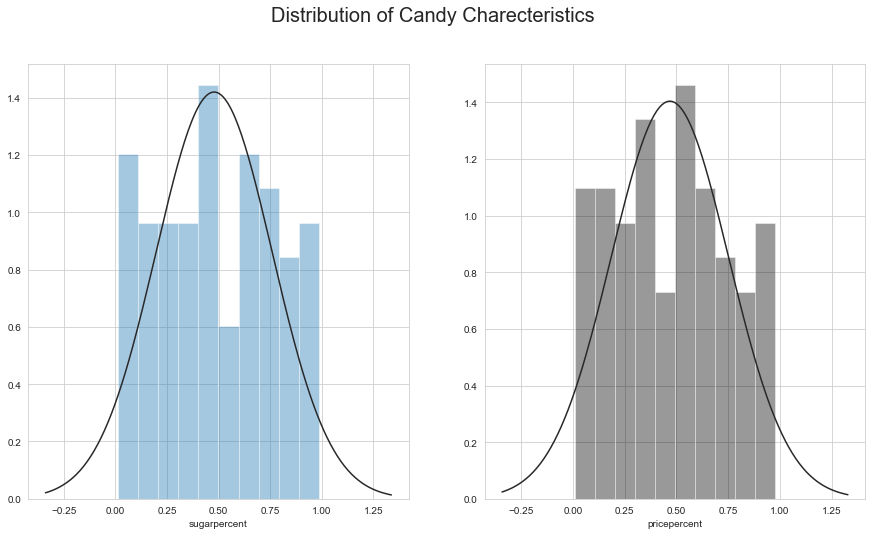

In [374]:
sns.set_style("whitegrid")

plt.figure(figsize=(15,8))
plt.suptitle("Distribution of Candy Charecteristics", fontsize=20)
plt.subplot(1,2,1)
sns.distplot(df["sugarpercent"], bins =10, kde=False, fit= norm)
plt.subplot(1,2,2)
sns.distplot(df["pricepercent"], bins =10, kde=False, fit= norm, color='k')

plt.savefig("candy_sugar_price_dist.jpg")
plt.show()


## Observations
- Slightly skewed data
- Almost normal distribution


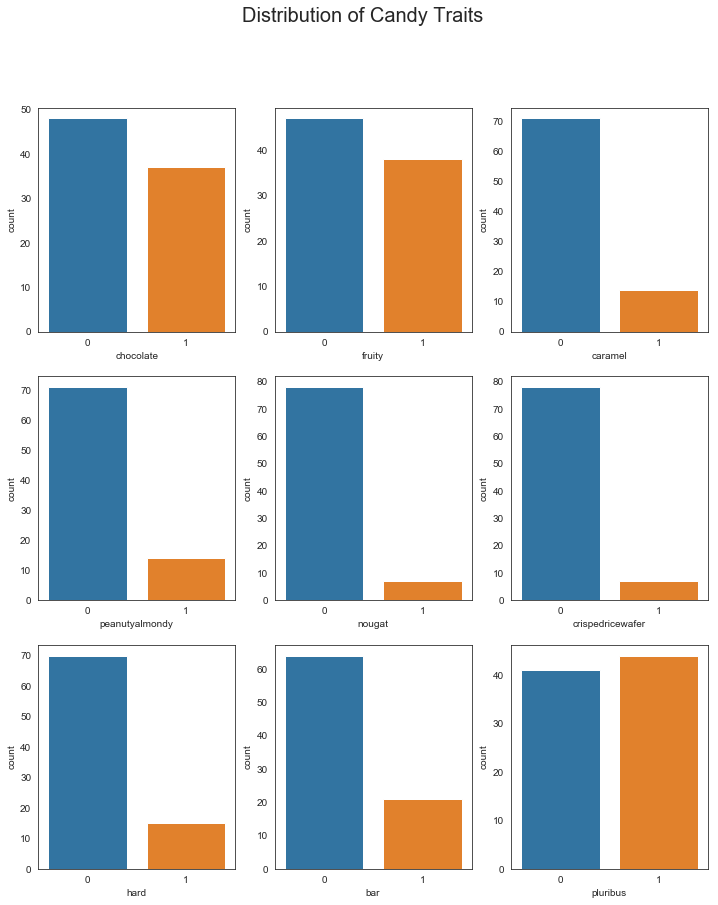

In [372]:
f, axes = plt.subplots(3, 3, figsize=(12, 14))
plt.suptitle('Distribution of Candy Traits', fontsize=20)
for i, e in enumerate([col for col in df.columns[1:10]]):
    sns.countplot(x=e, data=df,  ax=axes[i // 3][i % 3]);
    
plt.savefig("candy_data_dist.jpg")

## Chocolate

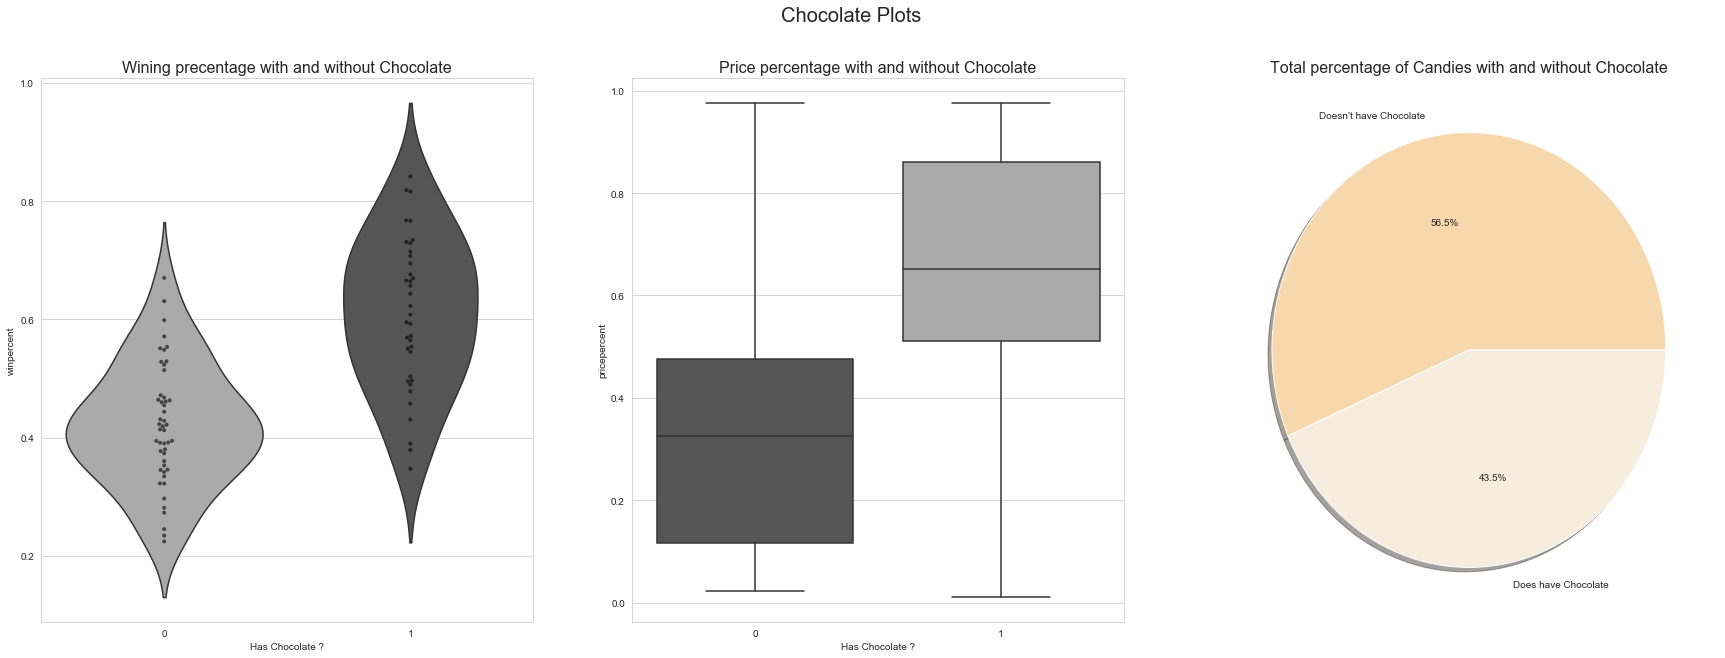

In [218]:
plt.figure(figsize=(30,10))

plt.suptitle("Chocolate Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Winning precentage with and without Chocolate",fontsize=16)
sns.violinplot(data=df,x="chocolate",y="winpercent",color="brown",palette="gray_r", inner=None)
sns.swarmplot(x="chocolate", y="winpercent",color="k", size=4, data=df, alpha=0.6);
plt.xlabel("Has Chocolate ?")

plt.subplot(1,3,2)
plt.title("Price percentage with and without Chocolate",fontsize=16)
sns.boxplot(y="pricepercent", x="chocolate", data=df, palette="gray")
plt.xlabel("Has Chocolate ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Chocolate",fontsize=16)
plt.pie(df.chocolate.value_counts(), autopct='%1.1f%%',colors=["#F7D8AD","#F7EDDF"],labels=["Doesn't have Chocolate","Does have Chocolate"],shadow=True)

plt.show()

## Observations
- Higher win percentage then rest of the traits
- More expensive than others
- Popular trait, almost half of the candies have chocolate

## Fruity

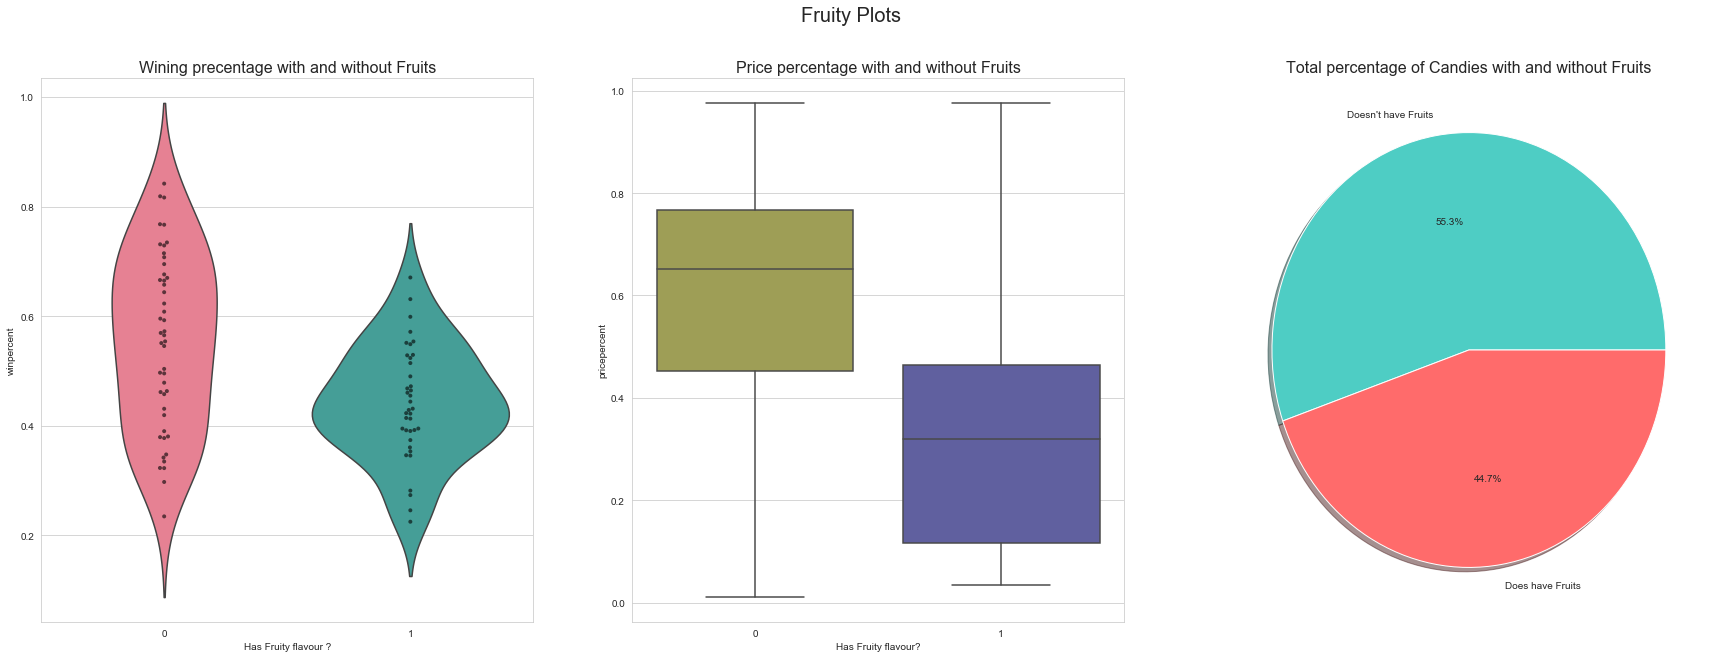

In [219]:
plt.figure(figsize=(30,10))

plt.suptitle("Fruity Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Winning precentage with and without Fruits",fontsize=16)
sns.violinplot(data=df,x="fruity",y="winpercent",color="brown",palette="husl", inner=None)
sns.swarmplot(x="fruity", y="winpercent",color="k", size=4, data=df, alpha=0.6);
plt.xlabel("Has Fruity flavour ?")

plt.subplot(1,3,2)
plt.title("Price percentage with and without Fruits",fontsize=16)
sns.boxplot(y="pricepercent", x="fruity", data=df, palette="gist_stern_r")
plt.xlabel("Has Fruity flavour?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Fruits",fontsize=16)
plt.pie(df.fruity.value_counts(), autopct='%1.1f%%',colors=["#4ECDC4","#FF6B6B"],labels=["Doesn't have Fruits","Does have Fruits"],shadow=True)


plt.show()

## Observations
- Mean win percentage is just over 40%, not good
- Price is less than acndies having other ingredients
- Commonly used as it is present in almost 44.7% of sampled candies

## Caramel

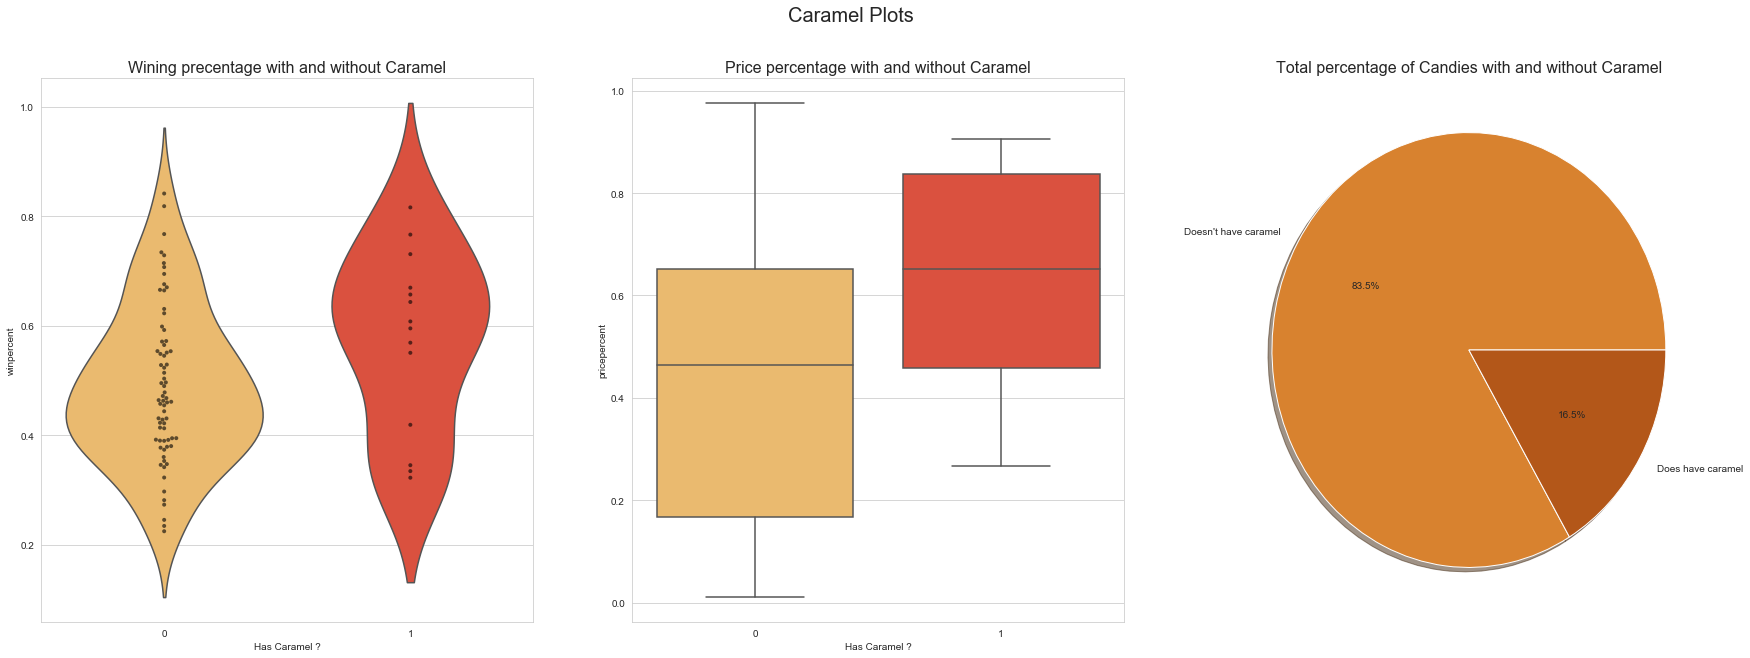

In [220]:
plt.figure(figsize=(30,10))

plt.suptitle("Caramel Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Winning precentage with and without Caramel",fontsize=16)
sns.violinplot(data=df,x="caramel",y="winpercent",color="brown",palette="YlOrRd", inner=None)
sns.swarmplot(x="caramel", y="winpercent",color="k", size=4, data=df, alpha=0.6);
plt.xlabel("Has Caramel ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Caramel",fontsize=16)
plt.pie(df.caramel.value_counts(), autopct='%1.1f%%',colors=["#D8822F","#B35719"],labels=["Doesn't have caramel","Does have caramel"],shadow=True)

plt.subplot(1,3,2)
plt.title("Price percentage with and without Caramel",fontsize=16)
sns.boxplot(y="pricepercent", x="caramel", data=df, palette="YlOrRd")
plt.xlabel("Has Caramel ?")

plt.show()

## Observations
- Has some effect on winpercent
- It's a bit costly
- It's not used very commonly (used in only 16.5% sampled candies)

## Peanutyalmondy

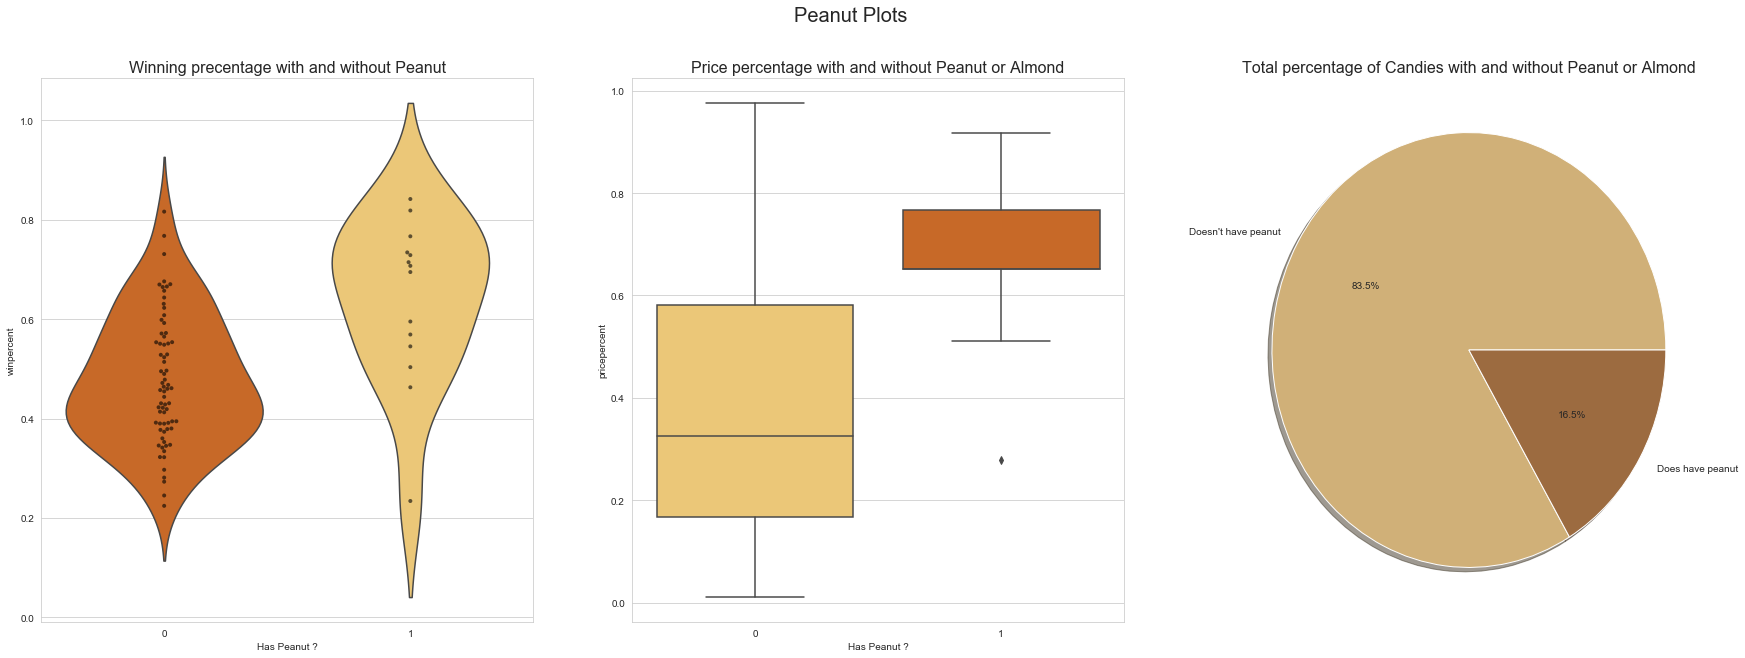

In [227]:
plt.figure(figsize=(30,10))

plt.suptitle("Peanut Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Winning precentage with and without Peanut",fontsize=16)
sns.violinplot(data=df,x="peanutyalmondy",y="winpercent",palette="YlOrBr_r", inner=None)
sns.swarmplot(x="peanutyalmondy", y="winpercent",color="k", size=4, data=df, alpha=0.6);
plt.xlabel("Has Peanut ?")

plt.subplot(1,3,2)
plt.title("Price percentage with and without Peanut or Almond",fontsize=16)
sns.boxplot(y="pricepercent", x="peanutyalmondy", data=df, palette="YlOrBr")
plt.xlabel("Has Peanut ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Peanut or Almond",fontsize=16)
plt.pie(df.peanutyalmondy.value_counts(), autopct='%1.1f%%',colors=["#D0B078","#9C6B40"],labels=["Doesn't have peanut","Does have peanut"],shadow=True)


plt.show()

## Observations
- High winpercent (mostly above 60%)
- Expensive
- But surprisingly not very commonly used (used in only 16.5% sampled candies) 

## Nougat

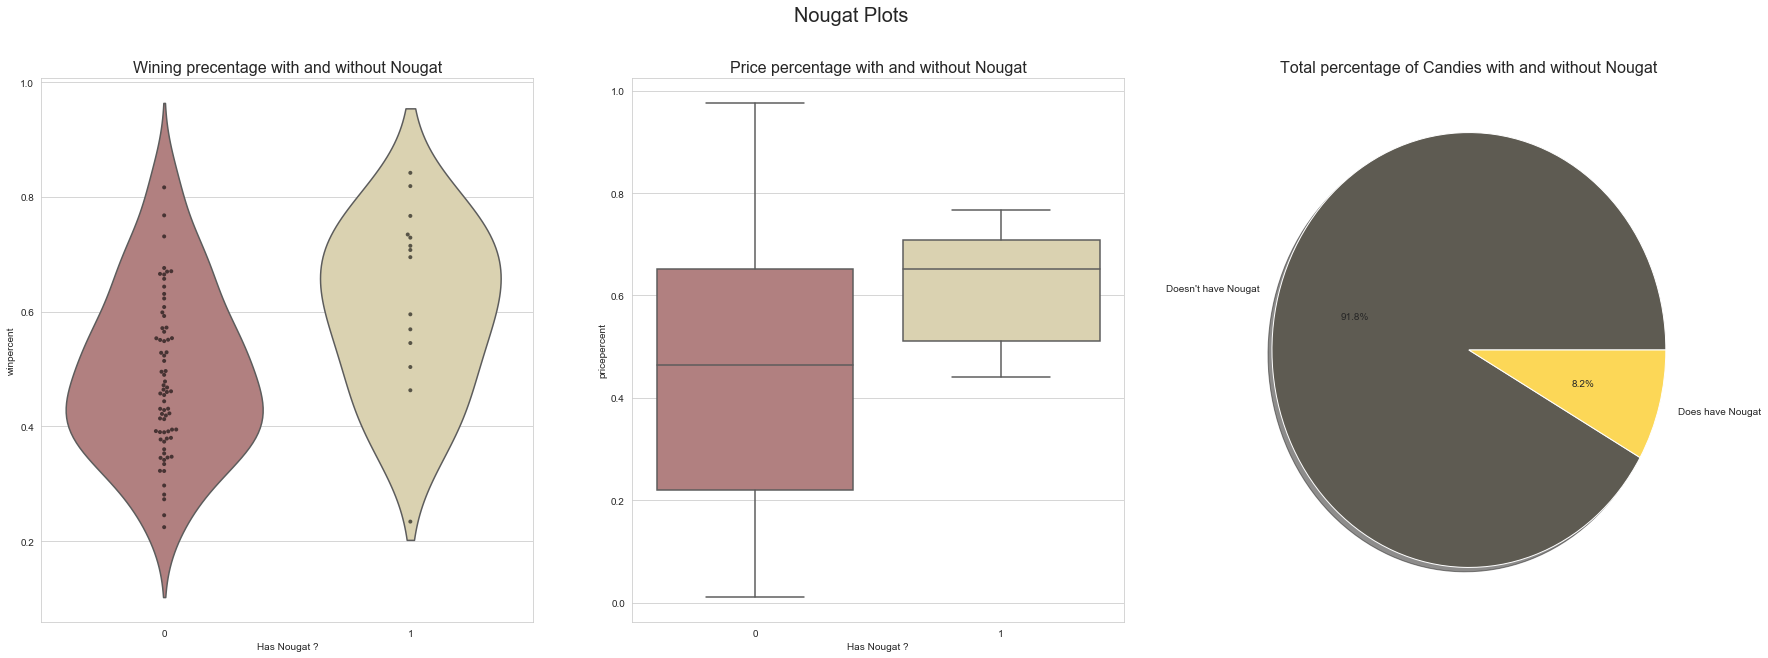

In [222]:
plt.figure(figsize=(30,10))

plt.suptitle("Nougat Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Winning precentage with and without Nougat",fontsize=16)
sns.violinplot(data=df,x="nougat",y="winpercent",palette="pink", inner=None)
sns.swarmplot(x="peanutyalmondy", y="winpercent",color="k", size=4, data=df, alpha=0.6);
plt.xlabel("Has Nougat ?")

plt.subplot(1,3,2)
plt.title("Price percentage with and without Nougat",fontsize=16)
sns.boxplot(y="pricepercent", x="nougat", data=df, palette="pink")
plt.xlabel("Has Nougat ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Nougat",fontsize=16)
plt.pie(df.nougat.value_counts(), autopct='%1.1f%%',colors=["#5e5b52","#fcd757"],labels=["Doesn't have Nougat","Does have Nougat"],shadow=True)


plt.show()

## Observations
- A little effect on  winning percentage (majority of  scores are between 60 to 80 %)
- Slightly expensive than the others
- Not commonly used

## Crisped Rice, Wafer or Cookie

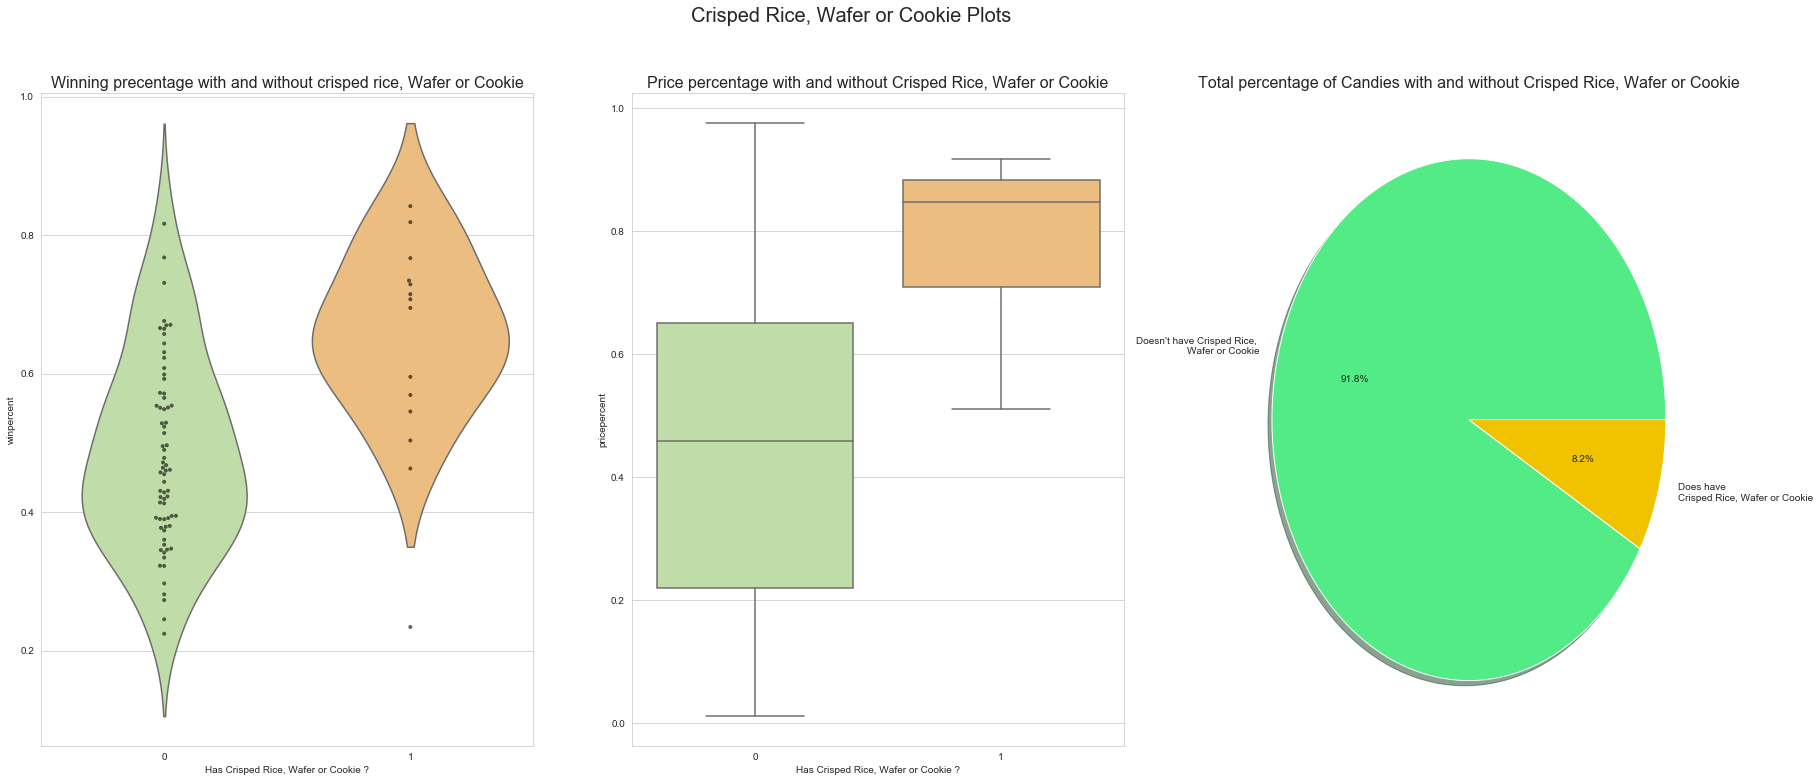

In [226]:
plt.figure(figsize=(30,12))

plt.suptitle("Crisped Rice, Wafer or Cookie Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Winning precentage with and without crisped rice, Wafer or Cookie",fontsize=16)
sns.violinplot(data=df,x="crispedricewafer",y="winpercent",palette="Spectral_r", inner=None)
sns.swarmplot(x="peanutyalmondy", y="winpercent",color="k", size=4, data=df, alpha=0.6);
plt.xlabel("Has Crisped Rice, Wafer or Cookie ?")

plt.subplot(1,3,2)
plt.title("Price percentage with and without Crisped Rice, Wafer or Cookie",fontsize=16)
sns.boxplot(y="pricepercent", x="crispedricewafer", data=df, palette="Spectral_r")
plt.xlabel("Has Crisped Rice, Wafer or Cookie ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Crisped Rice, Wafer or Cookie",fontsize=16)
plt.pie(df.crispedricewafer.value_counts(), autopct='%1.1f%%',colors=["#52eb86","#f0c200"],labels=["Doesn't have Crisped Rice, \nWafer or Cookie","Does have \nCrisped Rice, Wafer or Cookie"],shadow=True)


plt.show()

## Observations
- High winpercent
- More expensive than the others
- Not commonly used

## Hard Candy

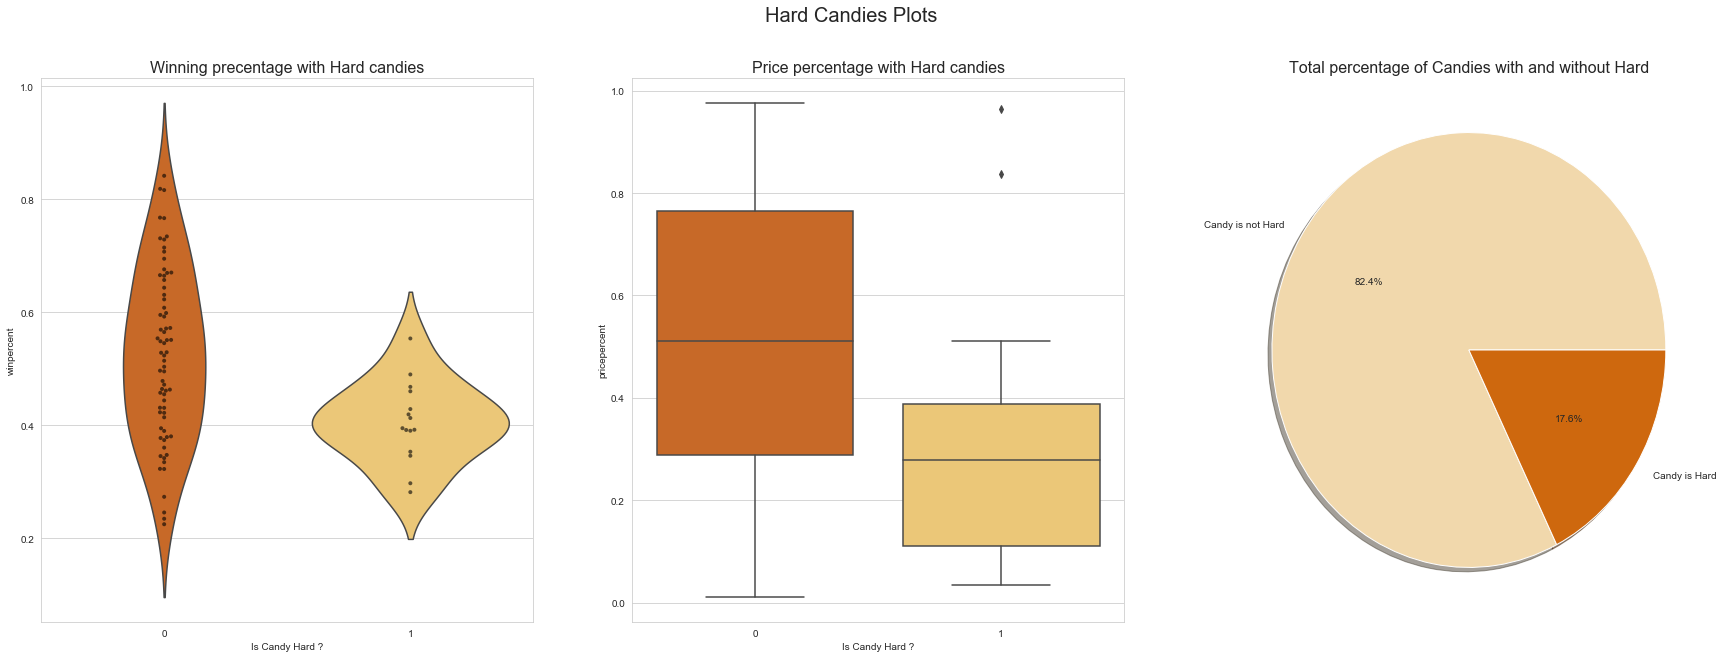

In [229]:
plt.figure(figsize=(30,10))

plt.suptitle("Hard Candies Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Winning precentage with Hard candies",fontsize=16)
sns.violinplot(data=df,x="hard",y="winpercent",palette="YlOrBr_r", inner=None)
sns.swarmplot(x="hard", y="winpercent",color="k", size=4, data=df, alpha=0.6);
plt.xlabel("Is Candy Hard ?")

plt.subplot(1,3,2)
plt.title("Price percentage with Hard candies",fontsize=16)
sns.boxplot(y="pricepercent", x="hard", data=df, palette="YlOrBr_r")
plt.xlabel("Is Candy Hard ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Hard",fontsize=16)
plt.pie(df.hard.value_counts(), autopct='%1.1f%%',colors=["#f1d8ac","#ce680e"],labels=["Candy is not Hard","Candy is Hard"],shadow=True)


plt.show()

## Observations
- Low winpercent
- Low price
- Not very common trait

## Candy Bars

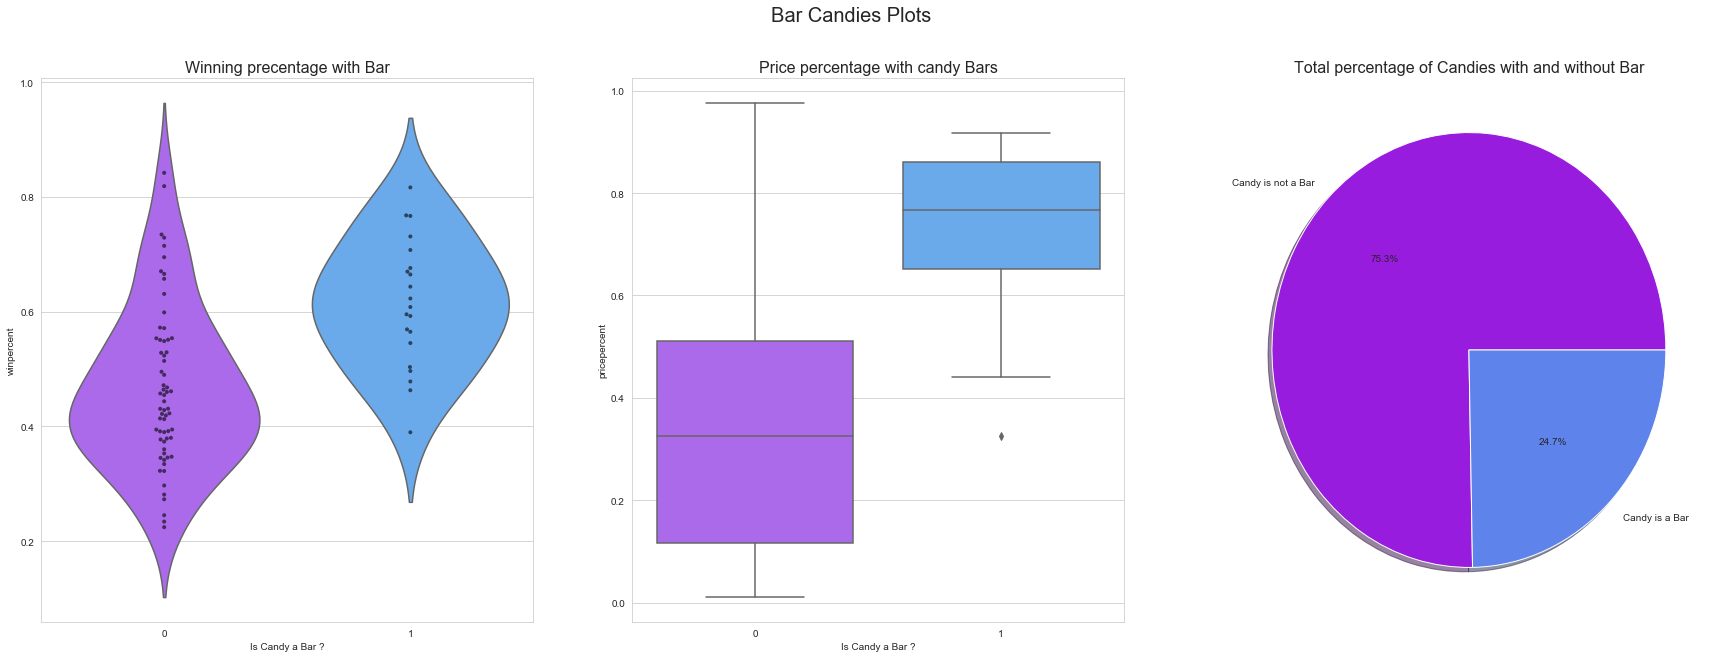

In [230]:
plt.figure(figsize=(30,10))

plt.suptitle("Bar Candies Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Winning precentage with Bar",fontsize=16)
sns.violinplot(data=df,x="bar",y="winpercent",palette="cool_r", inner=None)
sns.swarmplot(x="bar", y="winpercent",color="k", size=4, data=df, alpha=0.6);
plt.xlabel("Is Candy a Bar ?")

plt.subplot(1,3,2)
plt.title("Price percentage with candy Bars",fontsize=16)
sns.boxplot(y="pricepercent", x="bar", data=df, palette="cool_r")
plt.xlabel("Is Candy a Bar ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Bar",fontsize=16)
plt.pie(df.bar.value_counts(), autopct='%1.1f%%',colors=["#971cde","#5e84ec"],labels=["Candy is not a Bar","Candy is a Bar"],shadow=True)


plt.show()

## Observations
- A factor in winning 
- Expensive
- Frequently used

## Pluribus Candies

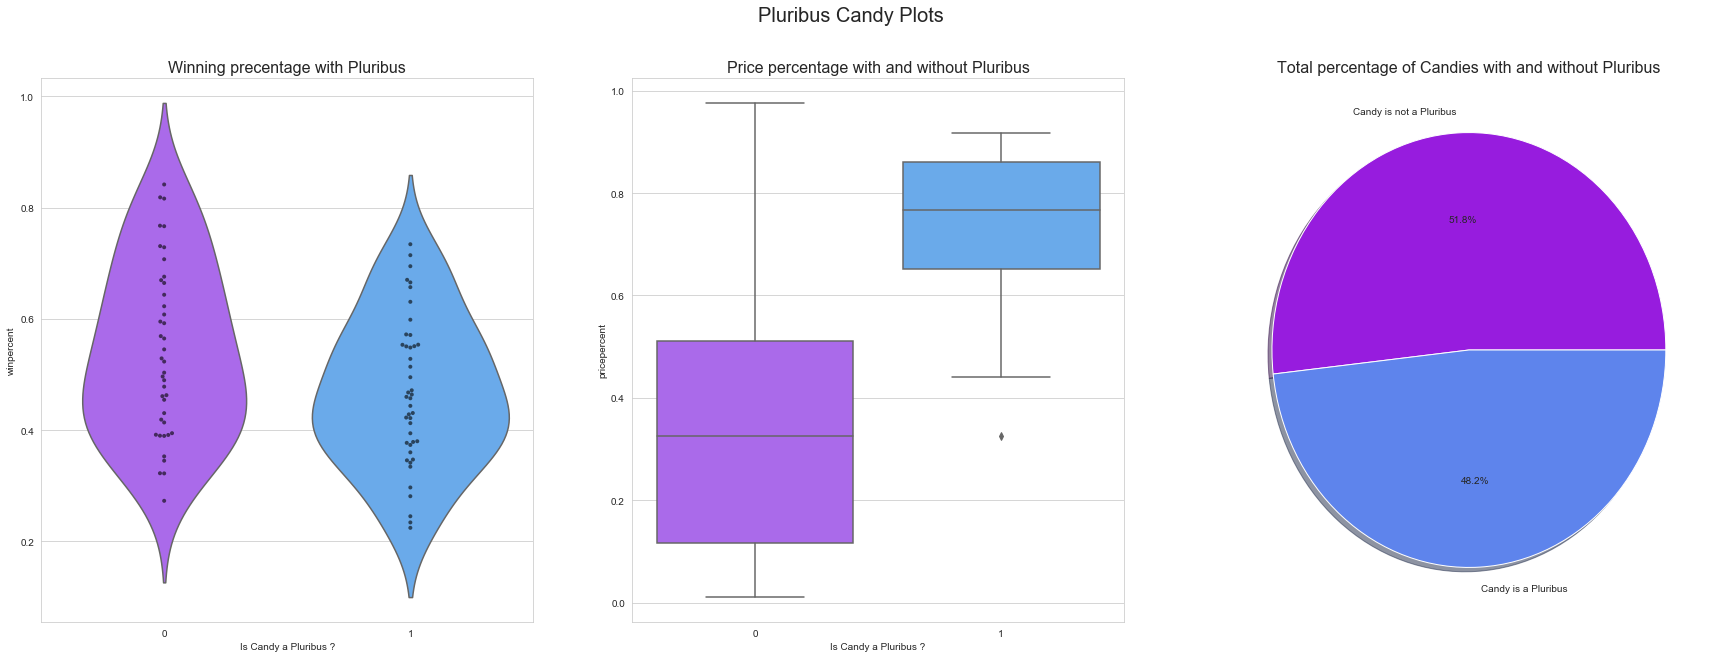

In [232]:
plt.figure(figsize=(30,10))

plt.suptitle("Pluribus Candy Plots", fontsize=20)

plt.subplot(1,3,1)
plt.title("Winning precentage with Pluribus",fontsize=16)
sns.violinplot(data=df,x="pluribus",y="winpercent",palette="cool_r", inner=None)
sns.swarmplot(x="pluribus", y="winpercent",color="k", size=4, data=df, alpha=0.6);
plt.xlabel("Is Candy a Pluribus ?")

plt.subplot(1,3,2)
plt.title("Price percentage with and without Pluribus",fontsize=16)
sns.boxplot(y="pricepercent", x="bar", data=df, palette="cool_r")
plt.xlabel("Is Candy a Pluribus ?")

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Pluribus",fontsize=16)
plt.pie(df.pluribus.value_counts(), autopct='%1.1f%%',colors=["#971cde","#5e84ec"],labels=["Candy is not a Pluribus","Candy is a Pluribus"],shadow=True)


plt.show()

## Observations
- Low winpercent (mean value just over 40%)
- Expensive than others
- Common trait

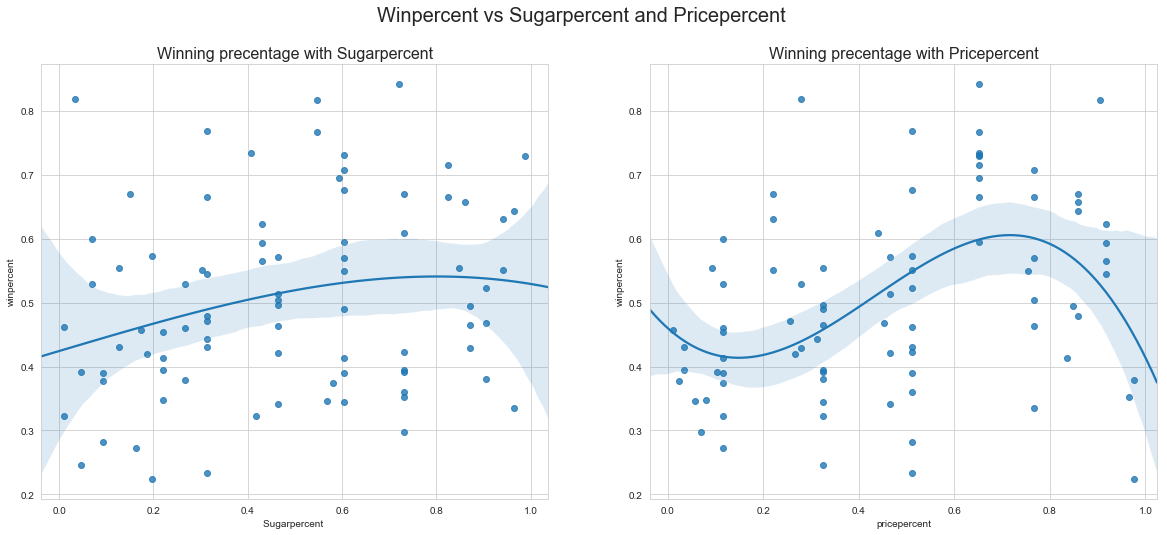

In [378]:
plt.figure(figsize=(20,8))

plt.suptitle("Winpercent vs Sugarpercent and Pricepercent", fontsize=20)

plt.subplot(1,2,1)
plt.title("Winning precentage with Sugarpercent",fontsize=16)
#sns.violinplot(data=df,x="sugarpercent",y="winpercent",palette="cool_r", inner=None)
sns.regplot(x=df["sugarpercent"], y=df["winpercent"], order =3)
#sns.swarmplot(x="sugarpercent", y="winpercent",color="k", size=4, data=df, alpha=0.6);
plt.xlabel("Sugarpercent ")

plt.subplot(1,2,2)
plt.title("Winning precentage with Pricepercent",fontsize=16)
sns.regplot(x=df["pricepercent"], y=df["winpercent"], order =3)
plt.xlabel("pricepercent")

plt.savefig("candy_sugar_price_win.jpg")
plt.show()

## Observations
- The correlation between sugarpercent and winpercent is slightly positive but become constant and slightly negative at very high sugar percentile
- The correlation between pricepercent and winpercent is not linear at higher price percentile it tends to go down rapidly showing people doesn't often buy expensive candies.

## Let's check the correlation between different types of candies.

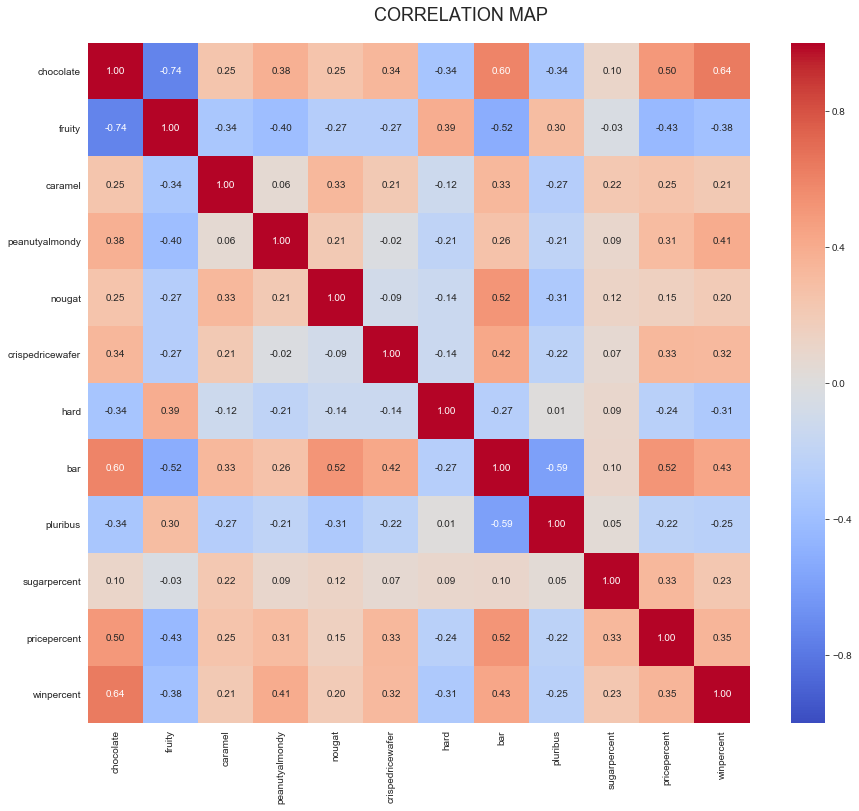

In [379]:
plt.figure(figsize=(14,12))
plt.suptitle("CORRELATION MAP", fontsize=18)
sns.heatmap(df.corr(), annot=True, fmt="0.2f", cmap="coolwarm", vmin=-1.0, vmax=1.0)
plt.tight_layout(pad=5.0)
plt.savefig("candy_corr_map.jpg")
plt.show()

## Observations
- Chocolate is highly correlated with winpercent (0.64). Chocolate sells
- Bar and Peanutyalmondy also have a considerable effect on winpercent
- Makers do not mix chocolate and fruits most of the time
- Candies wihch are shaped as bar generally has chocolate and/or nougat and they are least likely to be in a bag and have fruits 
- Bar and chocolate have the highest impact on price
- Sugar doesn't have a considerable effect on winning

## Varability Explanation using PCA

In [145]:
# Importing libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#Scaling data
scaler = MinMaxScaler(feature_range=[0, 1])
df_rescaled = scaler.fit_transform(df.iloc[:, 1:12])

#Fitting the PCA algorithm to our rescaled Data
pca = PCA().fit(df_rescaled)

In [243]:
print(pca.explained_variance_ratio_)

[0.42847719 0.13942305 0.082992   0.0725128  0.06705382 0.06027762
 0.04529969 0.03447837 0.03152252 0.02394438 0.01401857]


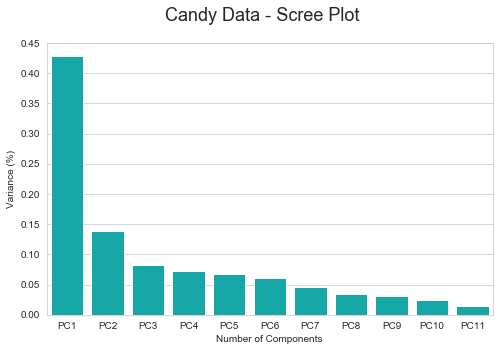

In [380]:

columns = ['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9', 'PC10', 'PC11']

#Plotting the Explained Variance
plt.figure(figsize=(8,5))
plt.suptitle("Candy Data - Scree Plot", fontsize=18)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
sns.barplot(x=columns, y=pca.explained_variance_ratio_, 
            color="c")
plt.savefig("candy_scree_plot.jpg")
plt.show()

## Observations
- PC1 covers the highest variability, around 42.84%
- 11 dimensions are required to cover 100% variability which is equal to the no of feautres in out data. So no need to drop any feature all are important.

# Modelling

## Train Test Split

In [245]:
# create train/test sets
from sklearn.model_selection import train_test_split

X = df.drop(['winpercent','competitorname'], axis=1) # Bropping competitor name as its not a contributing variable
y = df['winpercent']

# Creating train test split with test size of 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Linear Regression

In [247]:
# importing model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#fitting the model
lr = LinearRegression().fit(X_train, y_train)

#predicting output for train and test sets
y_train_pedict = lr.predict(X_train)
y_test_pedict = lr.predict(X_test)

In [347]:
#printing Error and scores

mse = mean_squared_error(y_test, lr.predict(X_test))
print("Mean Squared Error (MSE): %.4f" % mse)
print("Intercept: {}".format(lr.intercept_))
print('lr train score %.3f \nlr test score: %.3f' % (
lr.score(X_train,y_train),
lr.score(X_test, y_test)))

Mean Squared Error (MSE): 0.0110
Intercept: 0.3377823127543793
lr train score 0.526 
lr test score: 0.502


In [390]:
# Printing Features coeficents in order of importance
col_name = []
coef_val = []
coefs = lr.coef_
indices = np.argsort(coefs)[::-1] 
print ("Candy Data - Top most Important Features\n" )
for f in range(11): 
    col_name.append(X.columns[indices[f]]) 
    coef_val.append(coefs[indices[f]])
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], coefs[indices[f]]))

Candy Data - Top most Important Features

1. chocolate (0.195906)
2. peanutyalmondy (0.104553)
3. fruity (0.094040)
4. crispedricewafer (0.091089)
5. nougat (0.053239)
6. caramel (0.041582)
7. sugarpercent (0.024982)
8. pluribus (0.001232)
9. pricepercent (-0.002561)
10. bar (-0.017465)
11. hard (-0.033815)


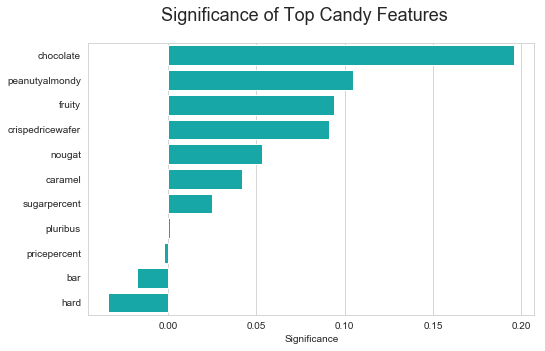

In [406]:
## plotting significance of different candy features.
sig = pd.DataFrame()
sig['feature']=col_name
sig['vals']=coef_val
sig.to_csv("feature_signi.csv")

plt.figure(figsize=(8,5))
plt.suptitle("Significance of Top Candy Features", fontsize=18)
plt.xlabel("Significance")             
sns.barplot(y= col_name, x=coef_val, color="c")

plt.savefig("candy_feat_signi.jpg")
plt.show()

## Observations
- The value of Test score (R-squared) 0.502 is not very good
- Chocolate Peanutyalmondy, fruity and crispedricewafer are most significant features for the model
- pricepercent, bar and hard have negative correlation in the model

## Explaining Model output using SHAP

In [262]:
# import SHAP and load JS visualization code to notebook
import shap
shap.initjs()

# explain the model's predictions using the LinearExplainer
explainer = shap.LinearExplainer(lr, X_train)
shap_values = explainer.shap_values(X_test)

C:\Users\Atif\Anaconda3\lib\site-packages\shap\explainers\linear.py:49: UserWarning: The default value for feature_dependence has been changed to "independent"!
  warnings.warn('The default value for feature_dependence has been changed to "independent"!')


### Visualizing a single  prediction's explanation

In [345]:

shap.force_plot(explainer.expected_value, shap_values[9,:], X_test.iloc[9,:])


The red values show features that push the prediction (winpercent) higher while blue values represents features that lowers the model output from the expected base value (average model output). For this particular candy: chocolate, crispedricewafer and sugarpercent are the largest factors contributing to a higher winpercent while caramel, fruity and pricepercent contributes towards lowering the winpercent.

### Visualizing explation across entire data set

In [264]:
shap.force_plot(explainer.expected_value, shap_values,X_test)


### Summary Visualization

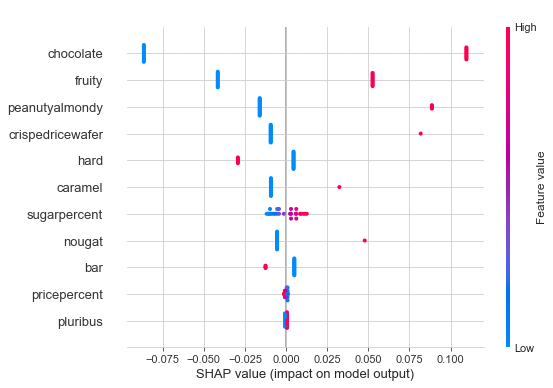

In [273]:
shap.summary_plot(shap_values, X_test)


In summary visualization each dot is colored according to the value of that feature for a specific prediction. For this model, Chocolate Peanutyalmondy, fruity and crispedricewafer affect a candy's winpercent the most while pluribus, pricepercent and bar affect the model prediction the least.

## Random Forest Regressor

In [316]:
#Importing library
from sklearn.ensemble import RandomForestRegressor

#defining the regressor model
RF_reg = RandomForestRegressor(n_estimators=10, random_state=0)

# We have used RandomizedSearchCV method to tune the hyperparameters

In [348]:
#fitting the model

RF_reg.fit(X_train, y_train)
#
#predicting test values
y_pred = RF_reg.predict(X_test)


#printing Error an scores
print('Mean Squared Error (MSE):',mean_squared_error(y_test, y_pred))
print ("Train R-squared: %.2f" %RF_reg.score(X_train, y_train) )
print ("Test R-squared: %.2f" %RF_reg.score(X_test, y_test) )

Mean Squared Error (MSE): 0.007799367443412405
Train R-squared: 0.81
Test R-squared: 0.65


In [327]:
# printing most important features in descending order

importances = RF_reg.feature_importances_
indices = np.argsort(importances)[::-1] 
print ("Candy Data - Top Important Features Features\n" )
for f in range(11): 
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Candy Data - Top Important Features Features

1. chocolate (0.422561)
2. sugarpercent (0.200555)
3. pricepercent (0.172131)
4. caramel (0.041051)
5. fruity (0.037970)
6. pluribus (0.036691)
7. peanutyalmondy (0.027262)
8. crispedricewafer (0.022603)
9. nougat (0.016686)
10. hard (0.014222)
11. bar (0.008268)


## Observations
- MSE is smaller when compare to linear regressor
- Test R-squared value (0.65) is much better than linear regressor (0.502)
- Chocolate, sugarpercent and pricepercent are most significant features for the model

## SHAP Visualizations

In [328]:
# explain the model's predictions using the TreeExplainer
explainer = shap.TreeExplainer(RF_reg)
shap_values = explainer.shap_values(X_test)

### Visualizing a single  prediction's explanation

In [329]:
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:])


For this particular candy: fruity, pluribus are the largest factors contributing to a higher winpercent while chocolate (=0) and sugarpercent  contributes towards lowering the winpercent.

### Visualizing explation across entire data set

In [330]:
shap.force_plot(explainer.expected_value, shap_values,X_test)


### Summary Visualization

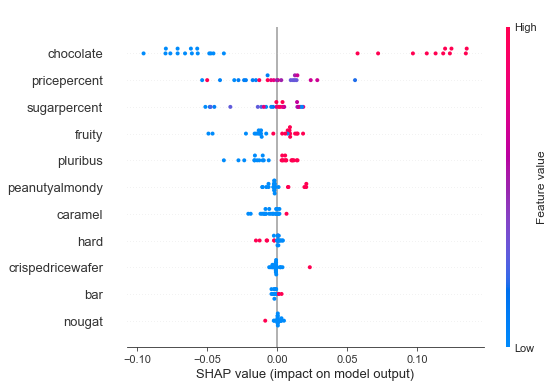

In [331]:
sns.set_style('white')

# summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

For this model, Chocolate pricepercent, sugarpercent and fruity affect a candy's winpercent the most while nougat, bar and crispedricewafer affect the model prediction the least.

## Gradient Boosting Regressor

In [349]:
# importing the  model
from sklearn.ensemble import GradientBoostingRegressor


# fitting the model
gb = GradientBoostingRegressor(n_estimators=200, max_depth=4, min_samples_split=2,
                               learning_rate=0.01, loss='ls')
gb.fit(X_train, y_train)

# calculate mean absolute error
mse = mean_squared_error(y_test, gb.predict(X_test))
print("MSE: %.4f" % mse)
#mae = mean_absolute_error(y_train, gb.predict(X_train))
#msPe = mse*100.0/y_train.mean()
#print(f'{msPe:.2f} error')
print ("Train R-squared: %.2f" %gb.score(X_train, y_train) )
print ("Test R-squared: %.2f" %gb.score(X_test, y_test) )



MSE: 0.0107
Train R-squared: 0.81
Test R-squared: 0.52


In [350]:
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1] 
print ("Candy Data - Top Important Features Features\n" )
for f in range(11): 
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Candy Data - Top Important Features Features

1. chocolate (0.499497)
2. pricepercent (0.247493)
3. sugarpercent (0.088886)
4. caramel (0.055201)
5. crispedricewafer (0.034827)
6. peanutyalmondy (0.031133)
7. fruity (0.015234)
8. bar (0.011942)
9. pluribus (0.006654)
10. nougat (0.005171)
11. hard (0.003962)


## Observations
- MSE is smaller when compare to linear regressor but lager that random forest
- Test R-squared value (0.52) is much lower than random forest (0.65)but equivalent to linear regressor (0.502)
- Chocolate, pricepercent, sugarpercent and caramel are most significant features for the model

## SHAP Visualizations

In [351]:

# explain the model's predictions using the TreeExplainer
explainer = shap.TreeExplainer(gb)
shap_values = explainer.shap_values(X_test)


### Visualizing a single  prediction's explanation

In [336]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[3,:], X_test.iloc[3,:])


For this particular candy: fruity, pricepercent are the largest factors contributing to a higher winpercent while chocolate (=0), peantyalomndy (=0) and hard contributes towards lowering the winpercent.

### Visualizing explation across entire data set

In [337]:
shap.force_plot(explainer.expected_value, shap_values,X_test)


### Sumarry Visualization

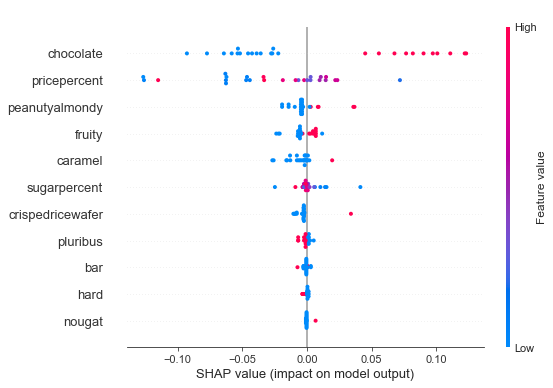

In [338]:
sns.set_style('white')

# summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

For this model, Chocolate pricepercent, peanutyalmondy and fruity affect a candy's winpercent the most while nougat, hard and bar affect the model prediction the least.

## Comparitive visualization of different model's errors

In [367]:
models = ["Linear", "Random  Forest", "Gradient Boosting"]
MSE = [0.0110,0.0077,0.0107]
train_score = [0.526,0.810,0.810]
test_score = [0.502,0.650,0.520]



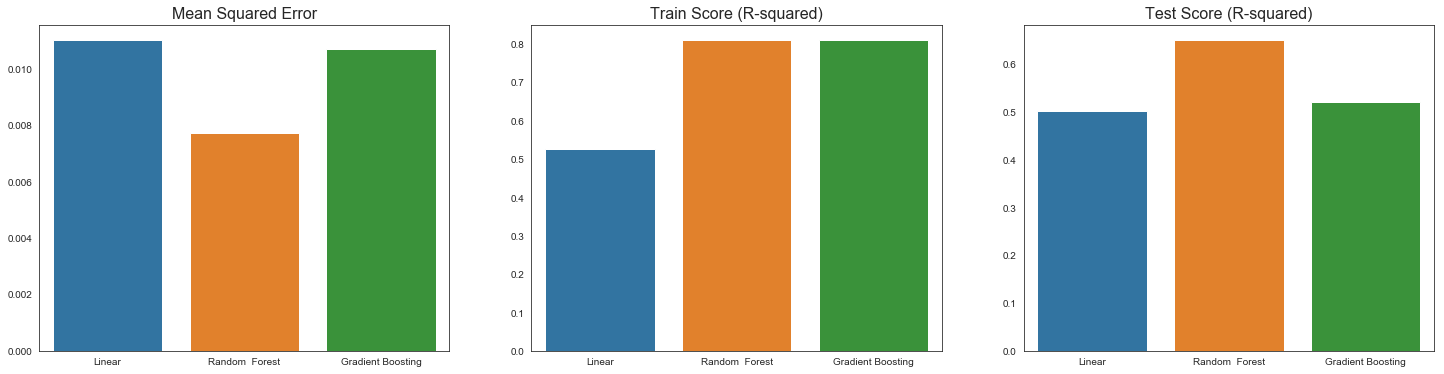

In [369]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt.title("Mean Squared Error",fontsize=16)
sns.barplot(x=models, y=MSE)

plt.subplot(1,3,2)
plt.title("Train Score (R-squared)",fontsize=16)
sns.barplot(x=models, y=train_score)

plt.subplot(1,3,3)
plt.title("Test Score (R-squared)",fontsize=16)
sns.barplot(x=models, y=test_score)

plt.show()

- Although Random forest has least MSE and best Test Score. The difference between train score (0.81) and test score (0.65) is huge, it could be that the model is doing overfitting
- That's why we choose linear model as its train score (0.526) and train score (0.502) are comparable for our recommendations.

# Recommendations
We  recommend a new product consist of chocolate, peanutyalmondy, crispedricewafer, caramel and nougat and price range less than 0.70 percentile. 


| Features              	| Significance Value 	| Selection 	| Winpercent Contribution 	|
|-----------------------	|--------------------	|-----------	|-------------------------	|
| Intercept             	| 0.3377823127       	| 1         	| 0.3377823127            	|
| chocolate             	| 0.1959056055       	| 1         	| 0.1959056055            	|
| peanutyalmondy        	| 0.1045532375       	| 1         	| 0.1045532375            	|
| fruity                	| 0.0940403779       	| 0         	| 0                       	|
| crispedricewafer      	| 0.09108895233      	| 1         	| 0.09108895233           	|
| nougat                	| 0.05323885343      	| 1         	| 0.05323885343           	|
| caramel               	| 0.04158203473      	| 1         	| 0.04158203473           	|
| sugarpercent          	| 0.02498215563      	| 0.7       	| 0.01748750894           	|
| pluribus              	| 0.001231654791     	| 0         	| 0                       	|
| pricepercent          	| -0.002560785171    	| 0.7       	| -0.00179254962          	|
| bar                   	| -0.01746473021     	| 0         	| 0                       	|
| hard                  	| -0.03381523833     	| 0         	| 0                       	|
| Winpercent Prediction 	|                    	|           	| 0.8398459555            	|